In [466]:
# Importing libraries and packages
import numpy as np
from scipy.stats import multivariate_normal, norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture

# Data path
data = "../Data/"

# Exercise 5: Clustering
This assignment is based on the previously generated 2-dimensional data of the three classes (5, 6 and 8) from the MNIST database of handwritten digits. 

First, mix the 2-dimensional data (training data only) by removing the labels and then use one Gaussian mixture model to model them. 

Secondly, compare the Gaussian mixture model with the Gaussian models trained in the previous assignment, in terms of mean and variance values as well as through visualisation.

## Loading the data and mixing
First we load the exercise data set, combine the individual training sets into one and shuffle the data to ensure a random shuffle (here with a seed to ensure reproducability). 

In [467]:
# Load data and mixing it
data_path = "2D568class.mat"
data = loadmat(data+data_path)
train5 = data["trn5_2dim"]/255
train6 = data["trn6_2dim"]/255
train8 = data["trn8_2dim"]/255

trainset = np.concatenate([train5, train6, train8])
np.random.seed(0)
np.random.shuffle(trainset)
print(f"train5: \n{train5}")
print(f"train6: \n{train6}")
print(f"train8: \n{train8}")
print(f"trainset: \n{trainset}")

train5: 
[[-1.50392803  0.07382428]
 [-0.47966968  2.54744033]
 [-1.36584092  2.71526073]
 ...
 [-0.05322445  1.88652704]
 [-0.2156543   2.21910803]
 [-2.77636742 -0.15215605]]
train6: 
[[ 0.88225997  0.85788401]
 [ 3.04834863  1.21051454]
 [ 1.8685812   1.27250168]
 ...
 [ 1.87461518  3.31305368]
 [ 1.84291125  2.4354789 ]
 [-3.00595191  1.96897302]]
train8: 
[[-3.00595191  1.96897302]
 [-2.939449    1.92534439]
 [-3.15082944  0.67295274]
 ...
 [-1.85638874  1.17240379]
 [-2.71620439  0.14798899]
 [-1.40171682  2.0990662 ]]
trainset: 
[[-0.70687749 -0.65952951]
 [ 1.73306832  0.68856751]
 [ 0.89717341 -4.88350419]
 ...
 [ 4.61187964  0.42663665]
 [ 1.83226305  3.1299974 ]
 [-0.88510255 -4.38931241]]


## Creating a Gaussian Mixture model
First create a Gaussian Mixture Model of the data using sklearn

In [468]:
# Creating a gaussian mixture model
n_components = 3
gmm = GaussianMixture(n_components)

# Fit the GMM to the data
gmm.fit(trainset)

# Trying stuff?
labels = gmm.predict(trainset)
probs = gmm.predict_proba(trainset)
print(probs[:5].round(3))
#plt.scatter(trainset[:, 0], trainset[:, 1], c=labels, s=40, cmap='viridis', edgecolors="k")
#plt.show()

[[0.891 0.    0.109]
 [0.009 0.948 0.044]
 [1.    0.    0.   ]
 [0.002 0.6   0.398]
 [1.    0.    0.   ]]


## Creating Gaussian models
Following the same approach from the previous exercises we can also estimate Gaussian models for each class

In [469]:
# Computing mean
mean5 = np.mean(train5, axis=0)
mean6 = np.mean(train6, axis=0)
mean8 = np.mean(train8, axis=0)
means = [mean5, mean6, mean8]

# Computing variance
cov5 = np.cov(train5, rowvar=False)
cov6 = np.cov(train6, rowvar=False)
cov8 = np.cov(train8, rowvar=False)
covs = [cov5, cov6, cov8]


print(f"mean5: {mean5}\nmean6: {mean6}\nmean8: {mean8}\n")
print(f"cov5: \n{cov5}\ncov6: \n{cov6}\ncov8: \n{cov8}")


mean5: [-1.09629628 -0.35037072]
mean6: [2.60384024 0.86074213]
mean8: [-1.61901038 -0.54586145]

cov5: 
[[ 1.79409703 -0.79112534]
 [-0.79112534  6.29247315]]
cov6: 
[[ 2.74853033 -1.87168656]
 [-1.87168656  3.09008399]]
cov8: 
[[ 1.51310487 -0.88278306]
 [-0.88278306  3.43018827]]


## Comparing means and covariance matrices.
Let's look at the means and covariance matrices.

First we extract the means and covariances from the GMM.

In [470]:
# Extract means and covariance from each component
gmm_means = gmm.means_
gmm_covs = gmm.covariances_

mean1_gmm = gmm_means[0] # Mean for component 1
mean2_gmm = gmm_means[1] # Mean for component 2
mean3_gmm = gmm_means[2] # Mean for component 3

cov1_gmm = gmm_covs[0] # Cov for component 1
cov2_gmm = gmm_covs[1] # Cov for component 2
cov3_gmm = gmm_covs[2] # Cov for component 3

print(f"mean1_gmm: {mean1_gmm}\nmean2_gmm: {mean2_gmm}\nmean3_gmm: {mean3_gmm}\n")
print(f"cov1_gmm: \n{cov1_gmm}\ncov2_gmm: \n{cov2_gmm}\ncov3_gmm: \n{cov3_gmm}")

mean1_gmm: [-1.00261972 -2.06286597]
mean2_gmm: [3.10749821 0.52284066]
mean3_gmm: [-1.43832858  1.61367239]

cov1_gmm: 
[[ 1.63584885 -0.55844505]
 [-0.55844505  2.2099024 ]]
cov2_gmm: 
[[ 1.77099366 -1.39504464]
 [-1.39504464  2.82063455]]
cov3_gmm: 
[[1.98073111 0.66161611]
 [0.66161611 1.36957752]]


Now we can compare the GMM means and covariances to the Gaussin models estimated for each class individually.

### Means and Covariances

mean5: [-1.09629628 -0.35037072]
mean6: [2.60384024 0.86074213]
mean8: [-1.61901038 -0.54586145]
mean1_gmm: [-1.00261972 -2.06286597]
mean2_gmm: [3.10749821 0.52284066]
mean3_gmm: [-1.43832858  1.61367239]


Text(0.5, 1.0, 'Cov. GMM kernel 3')

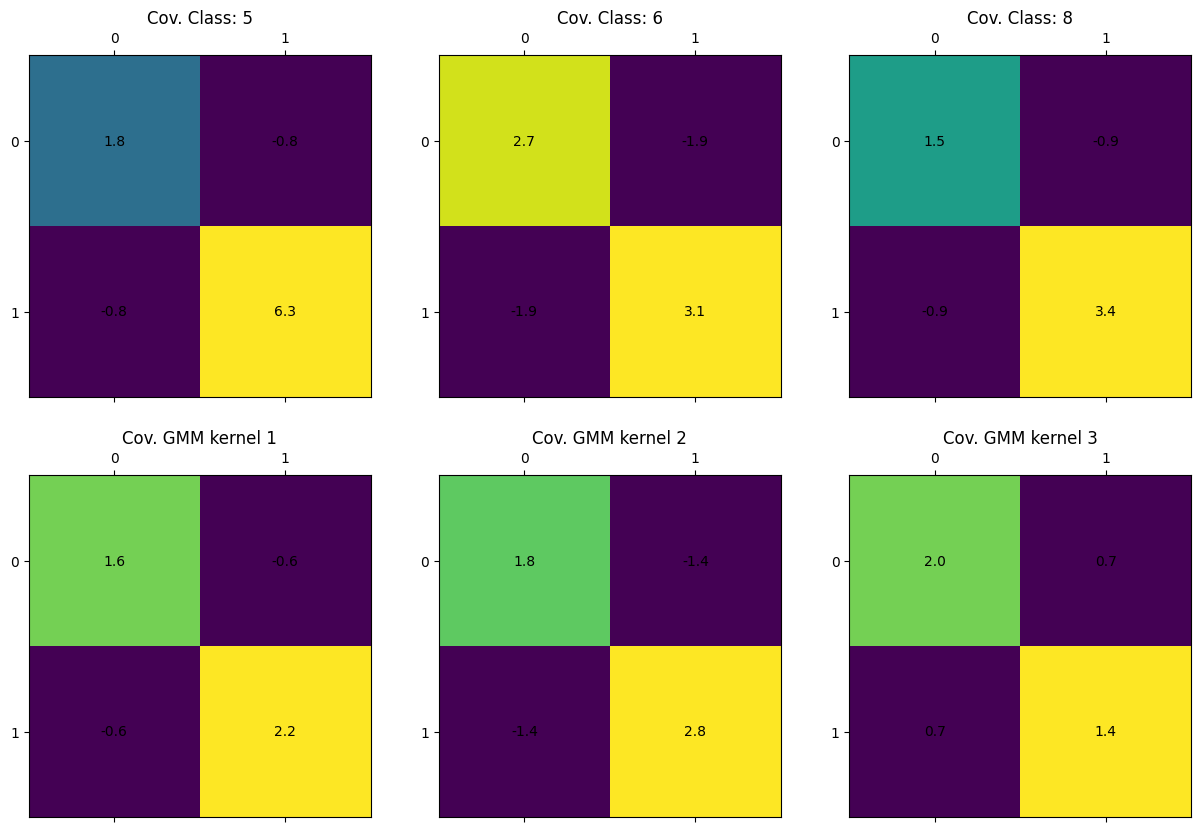

In [471]:
for name, mean in {"mean5": mean5, "mean6": mean6, "mean8": mean8, 
                    "mean1_gmm": mean1_gmm, "mean2_gmm": mean2_gmm, "mean3_gmm": mean3_gmm}.items():
     print(f"{name}: {np.array2string(mean)}")

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].matshow(cov5)
for (i, j), z in np.ndenumerate(cov5):
    axs[0, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 0].set_title("Cov. Class: 5")
axs[1, 0].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov1_gmm):
    axs[1, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 0].set_title("Cov. GMM kernel 1")
axs[0, 1].matshow(cov6)
for (i, j), z in np.ndenumerate(cov6):
    axs[0, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 1].set_title("Cov. Class: 6")
axs[1, 1].matshow(cov2_gmm)
for (i, j), z in np.ndenumerate(cov2_gmm):
    axs[1, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 1].set_title("Cov. GMM kernel 2")
axs[0, 2].matshow(cov8)
for (i, j), z in np.ndenumerate(cov8):
    axs[0, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 2].set_title("Cov. Class: 8")
c = axs[1, 2].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov3_gmm):
    axs[1, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 2].set_title("Cov. GMM kernel 3")

What do we see when comparing means and covariances?

## Visualizing the models in contourplots.
Now we would like to visualize our models to compare them.

We first generate some points to be able to sample from the models.

In [472]:
# Find min and max values in training set
#min1, max1 = np.min(trainset[:,0]), np.max(trainset[:,0])
#min2, max2 = np.min(trainset[:,1]), np.max(trainset[:,1])
min1, max1 = -8,8
min2, max2 = -8,8

print("Minimum Values:")
print(min1,min2)
print("Maximum Values:")
print(max1,max2)


Minimum Values:
-8 -8
Maximum Values:
8 8


In [473]:
#Create points to do a contour a plot
n = 500
x,y = np.meshgrid(np.linspace(min1,max1,n),
                  np.linspace(min2,max2,n))
xy = np.column_stack([x.ravel(),y.ravel()])
print(f"xy: \n{xy}")

# Generate samples from GMM
#samples = gmm.sample(n)
#print(f"Samples: {samples}")

xy: 
[[-8.         -8.        ]
 [-7.96793587 -8.        ]
 [-7.93587174 -8.        ]
 ...
 [ 7.93587174  8.        ]
 [ 7.96793587  8.        ]
 [ 8.          8.        ]]


We can also visualize the separate Gaussian models from the GMM by creating Gassians from the classwise means and covariances of the GMM model.

In [474]:
#gmm_1 = multivariate_normal(mean1_gmm,cov1_gmm)
#gmm_2 = multivariate_normal(mean2_gmm,cov2_gmm)
#gmm_3 = multivariate_normal(mean3_gmm,cov3_gmm)

gaussian_models = []
for i in range(3):
    gaussian_models.append(multivariate_normal(gmm_means[i],gmm_covs[i]))

gaussian_models2 = []
for i in range(3):
    gaussian_models2.append(multivariate_normal(means[i],covs[i]))

Now we sample from the models using the generated points.

In [475]:
#gmm_1_samples = gmm_1.rvs(n)
#gmm_2_samples = gmm_2.rvs(n)
#gmm_3_samples = gmm_3.rvs(n)

#gmm_samples = []
#for gmm_models in gaussian_models:
#    gmm_samples.append(gmm_models.rvs(n))

The model samples can then be visualized in a contour plot.

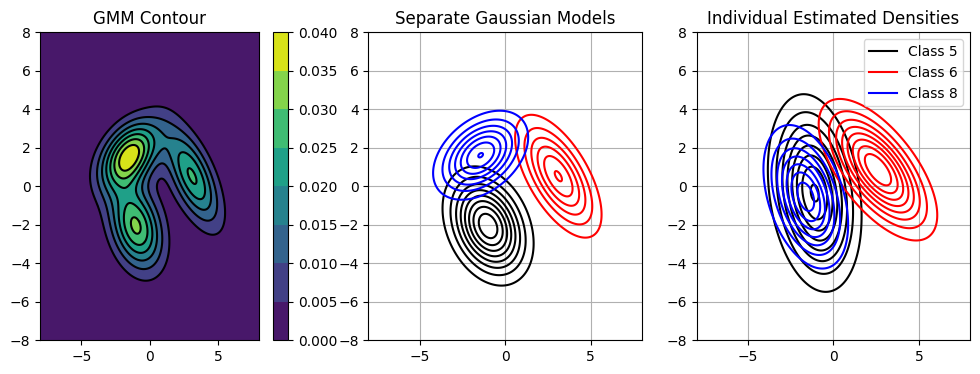

In [476]:
# Create contour plots
plt.figure(figsize=(12, 4))
levels = 8

plt.subplot(131)
plt.title('GMM Contour')
gmm_contour = plt.contourf(x, y, np.exp(gmm.score_samples(xy)).reshape(x.shape), levels, cmap='viridis') 
contour_lines = plt.contour(x, y, np.exp(gmm.score_samples(xy)).reshape(x.shape), levels, colors='black')
plt.clabel(contour_lines, inline=False, fontsize=False)
plt.colorbar(gmm_contour)

plt.subplot(132)
plt.title('Separate Gaussian Models')
colors = ["black", "red", "blue"]
for i in range(3):
    plt.contour(x, y, gaussian_models[i].pdf(xy).reshape(x.shape), levels, colors=colors[i])
    plt.grid(True)
    
plt.subplot(133)
plt.title('Individual Estimated Densities')
classes = ["Class 5", "Class 6", "Class 8"]
for i in range(3):
    contour = plt.contour(x, y, gaussian_models2[i].pdf(xy).reshape(x.shape), levels, colors=colors[i])
    plt.grid(True)
    # Add the legend for each contour
    plt.plot([],[], colors[i], label=classes[i])
    
# Add a legend for the subplots
plt.legend()
plt.show()